In [2]:
# Packages for analysis
import pandas as pd
import numpy as np
import os
from sklearn import svm


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
pwd

'/home/nbuser/library'

In [10]:
# Read in VIPQ data
system_data_full_data = pd.read_csv('Full DataCSV.csv')

In [11]:
system_data_full_data

,Type,Voltage Self Open,Voltage Neigh Open,Current Self Open,Current Neigh Open,Power Self Open,Power Neigh Open,Reactive Power Self Open,Reactive Power Neigh Open,Sample
0,Closed,2124.210532,1826.021285,2.122669,143.695577,247.701471,1197.061363,-305.000000,-1.160000e-08,1
1,Closed,2127.132191,1828.899920,2.120143,143.717812,245.523850,1197.360908,-306.000000,-1.210000e-08,2
2,Closed,2130.076816,1831.798486,2.117953,143.739061,242.787484,1197.656772,-308.000000,-3.430000e-09,3
3,Closed,2133.035478,1834.710984,2.115847,143.762325,240.026150,1197.940248,-310.000000,-1.060000e-08,4
4,Closed,2135.972186,1837.606078,2.113976,143.783531,237.446849,1198.252471,-311.000000,6.720000e-10,5
5,Closed,2138.942094,1840.528444,2.112290,143.806666,235.133273,1198.536737,-313.000000,9.560000e-09,6
6,Closed,2141.912705,1843.456201,2.110795,143.828514,232.695397,1198.839487,-314.000000,-2.570000e-09,7
7,Closed,2144.909868,1846.406915,2.109545,143.850506,229.946792,1199.133901,-316.000000,-1.700000e-08,8
8,Closed,2147.897848,1849.350229,2.108503,143.870403,227.453492,1199.448908,-317.000000,-1.820000e-08,9
9,Closed,2150.903389,1852.311482,2.107612,143.893993,224.730388,1199.731530,-319.000000,-1.560000e-08,10


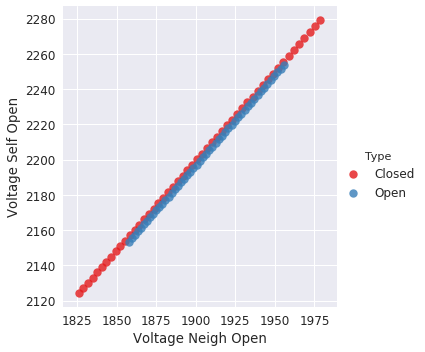

In [17]:
# Plot 2 Voltages
sns.lmplot('Voltage Neigh Open', 'Voltage Self Open', data=system_data_open_closed, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features